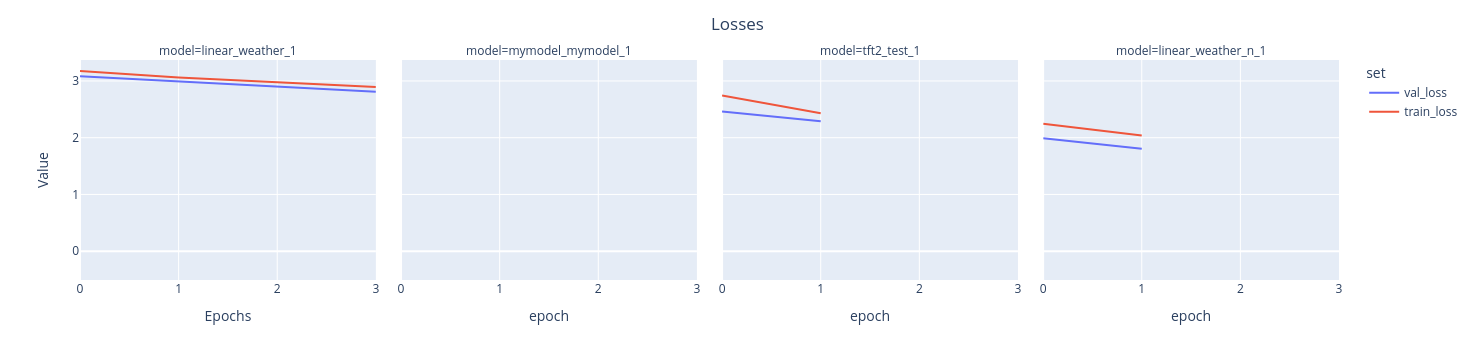

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
##Check the losses trend
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/test/csv/prova_test_LOSSES.csv')
fig_losses = px.line(tot_losses,x = 'epoch',y='loss',color = 'set',facet_col='model',width = 2600)
fig_losses.update_layout(title = {'text':f'Losses', 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    
fig_losses

In [3]:
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/test/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)


In [9]:
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/pollen/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)


In [10]:
tot_pred

Unnamed: 0  lag        time       region        totals  totals_pred  \
13311        13311    1  2001-04-15         Kevo  8.719308e-08     3.508963   
13312        13312    1  2001-04-16         Kevo  8.719308e-08     3.923813   
61985        61985    2  2001-04-16       Geneva  8.719308e-08     2.537340   
13313        13313    1  2001-04-17         Kevo  8.719308e-08     3.916022   
61986        61986    2  2001-04-17       Geneva  8.719308e-08     2.695206   
...            ...  ...         ...          ...           ...          ...   
674569      674569   14  2019-12-30  Mexico_City  8.100003e+00     9.547322   
646072      646072   14  2019-12-30       Sydney  1.598201e-06    14.856852   
678167      678167   14  2019-12-30     Santiago  7.166116e-07    -0.435638   
681006      681006   14  2019-12-30     Santiago  1.710000e+02   112.974884   
676368      676368   14  2019-12-30     Santiago  1.405129e-07     3.326327   

             model  
13311   linear_l_1  
13312   linear_l_1  
61985   linear_l_1  
13313   linear_l_1  
61986   linear_l_1  
...            ...  
674569  linear_l_1  
646072  linear_l_1  
678167  linear_l_1  
681006  linear_l_1  
676368  linear_l_1  

[681436 rows x 7 columns]

In [11]:
##some models does not give you the quantiles so, for seek of comparison, you can do this workaroud
tot_pred.y_pred[np.isnan(tot_pred.y_pred)] = tot_pred.y_median[np.isnan(tot_pred.y_pred)] 

AttributeError: 'DataFrame' object has no attribute 'y_median'

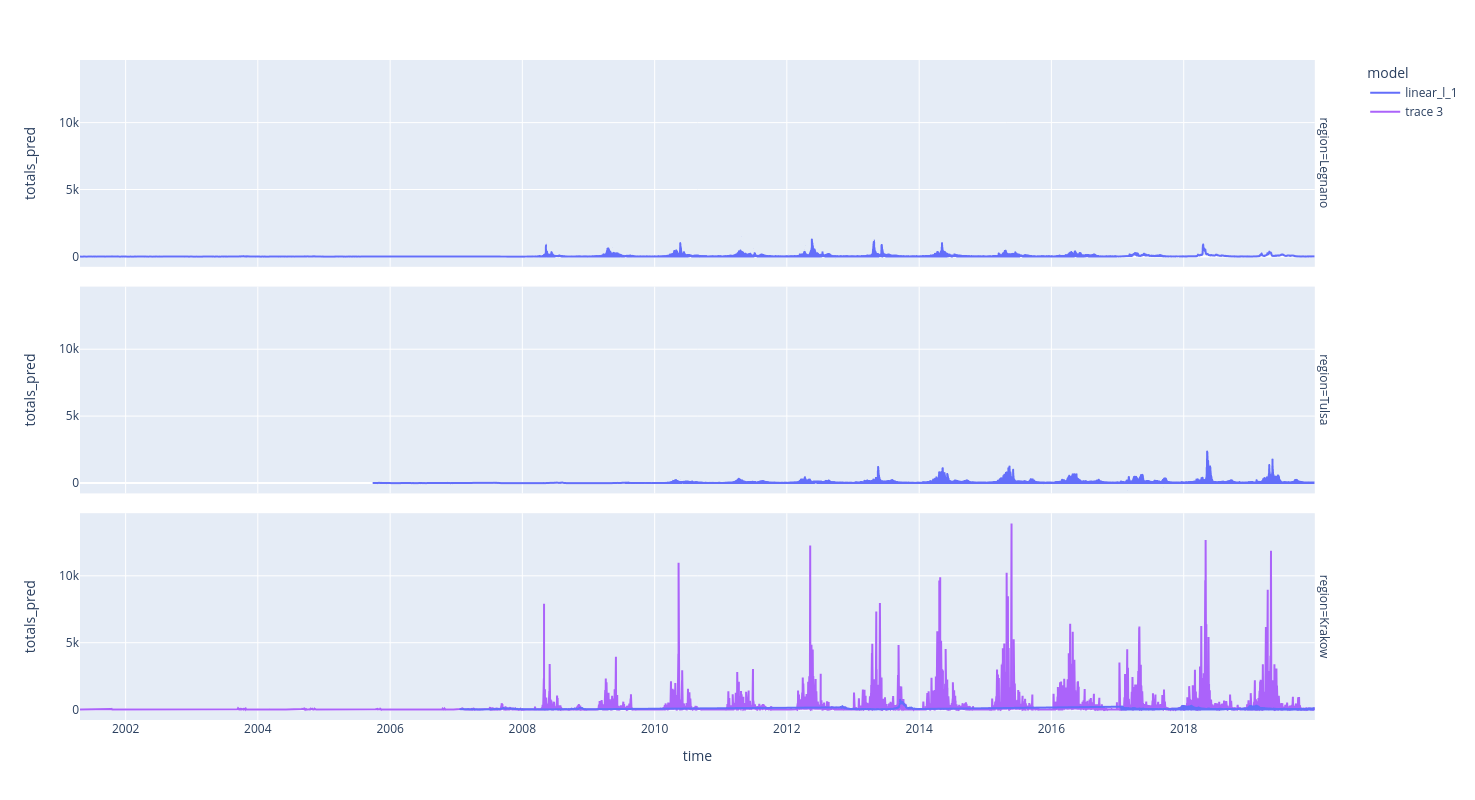

In [13]:
##let see how the prediction at step 10 are
lag=10

fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='totals_pred', color='model',height=800,facet_row='region')
fig.add_scatter(x = tot_pred[tot_pred.lag==lag].time, y=tot_pred[tot_pred.lag==lag].totals)

In [8]:
##let see how the prediction at step 10 are
lag=10

fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='y_median', color='model',height=800)
fig.add_scatter(x = tot_pred[tot_pred.lag==lag].time, y=tot_pred[tot_pred.lag==lag].y)


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'lag', 'time', 'region', 'totals', 'totals_pred', 'model'] but received: y_median

In [16]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: np.nanmean((x.y-x.y_pred)**2)).reset_index().rename(columns={0:'error'}) 


In [7]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: 100*np.nanmean(np.abs(x.y-x.y_median)/x.y)).reset_index().rename(columns={0:'error'}) 


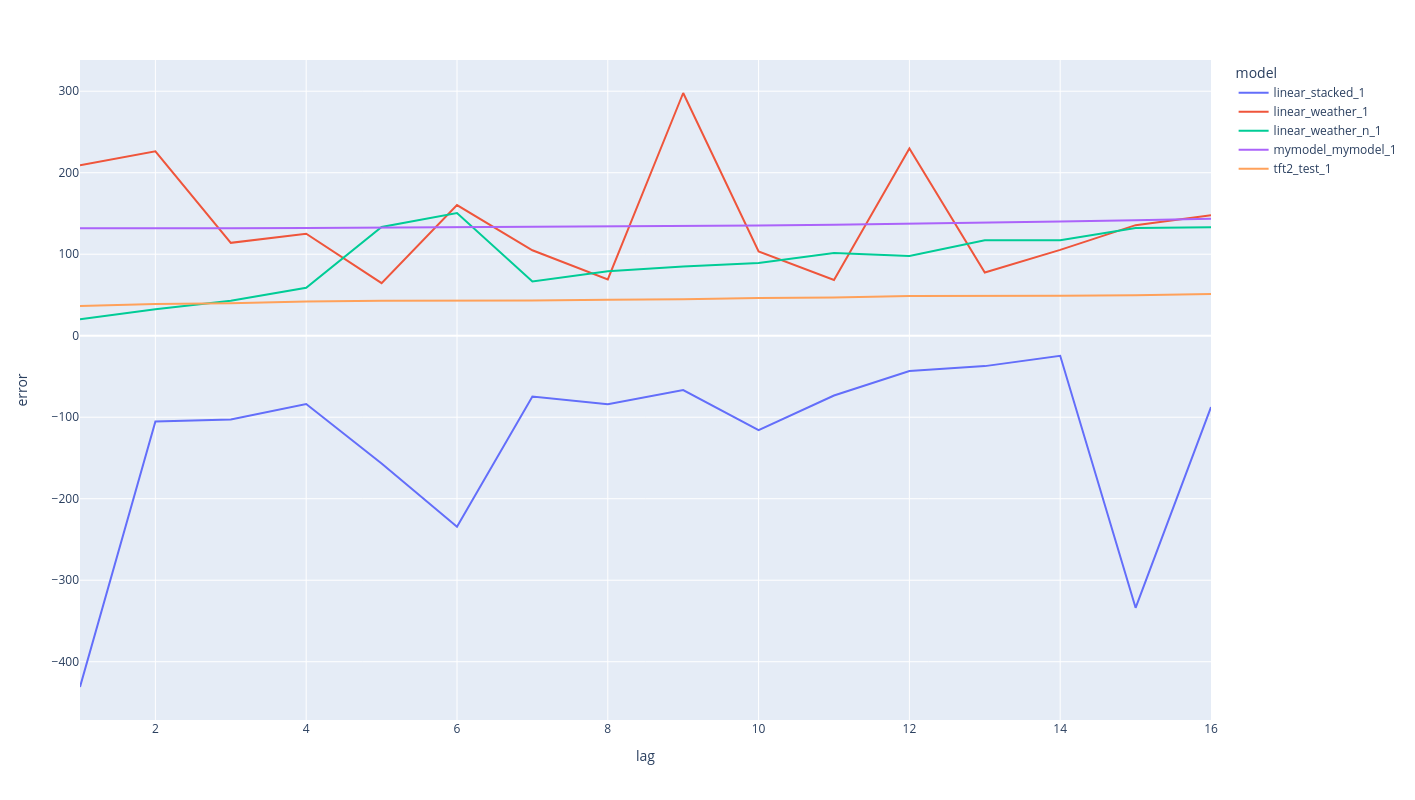

In [8]:
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show()